   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                               Chat   
2    

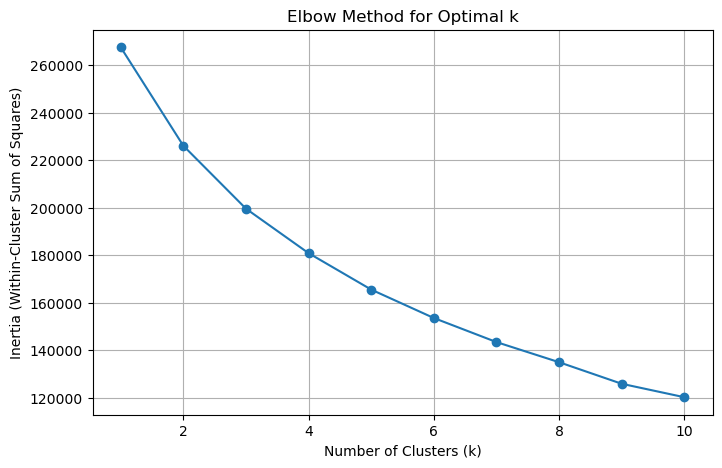

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)


print(df.head())
print(df.info())

df_numeric = df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

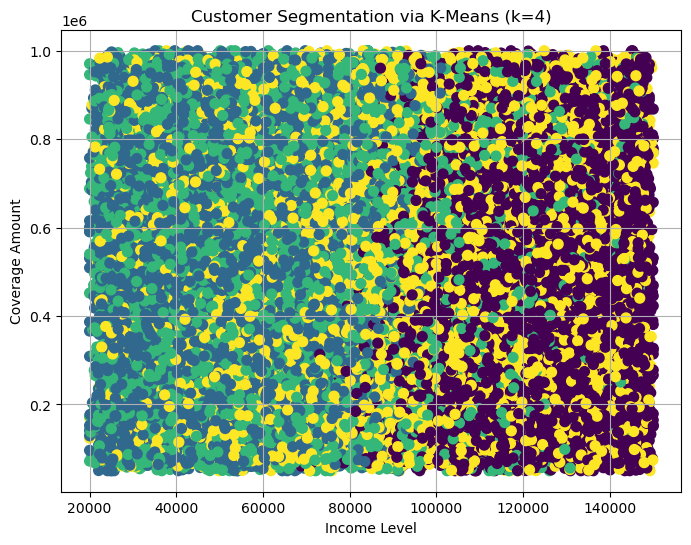

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = '/Users/anirudhravipudi/Desktop/AI/Practice/customer_segmentation_data.csv'
df = pd.read_csv(file_path)

# Select relevant numeric features
features = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize two dimensions (Income vs Coverage)
plt.figure(figsize=(8, 6))
plt.scatter(df['Income Level'], df['Coverage Amount'], 
            c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Income Level')
plt.ylabel('Coverage Amount')
plt.title('Customer Segmentation via K-Means (k=4)')
plt.grid(True)
plt.show()

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [15]:
df.head()
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level',
       'Geographic Information', 'Occupation', 'Income Level',
       'Behavioral Data', 'Purchase History',
       'Interactions with Customer Service', 'Insurance Products Owned',
       'Coverage Amount', 'Premium Amount', 'Policy Type',
       'Customer Preferences', 'Preferred Communication Channel',
       'Preferred Contact Time', 'Preferred Language', 'Segmentation Group',
       'Cluster'],
      dtype='object')

In [17]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.25516067 0.25082455]


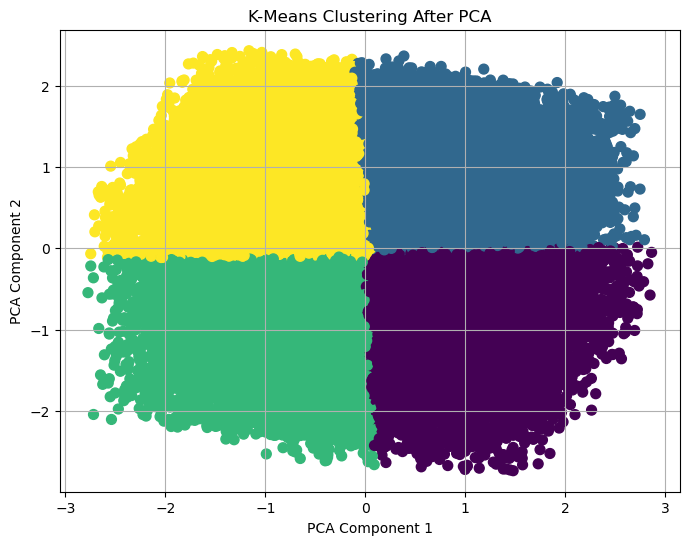

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_pca = KMeans(n_clusters=4, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title('K-Means Clustering After PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [21]:
df['PCA_Cluster'] = clusters_pca

In [25]:
df.groupby('PCA_Cluster').mean(numeric_only=True)

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount,Cluster
PCA_Cluster,,,,,,
0,52212.328438,41.259609,58746.351328,664228.668047,2048.226328,1.619219
1,51867.813559,54.850149,67170.275915,628310.189205,3847.997672,2.157125
2,53062.551776,33.365163,96781.102461,347726.675737,2057.857563,0.880826
3,52042.316566,45.334972,106361.750880,337209.205794,3864.610340,1.337099


In [27]:
df.groupby('PCA_Cluster').describe().transpose()

PCA_Cluster                         0               1              2  \
Customer ID     count    12800.000000    13747.000000   11907.000000   
                mean     52212.328438    51867.813559   53062.551776   
                std      27766.187041    28300.873718   28117.805614   
                min          1.000000        1.000000       1.000000   
                25%      29889.250000    28069.500000   29840.000000   
                50%      54719.500000    55496.000000   57403.000000   
                75%      75639.000000    75830.000000   76594.000000   
                max     100000.000000   100000.000000  100000.000000   
Age             count    12800.000000    13747.000000   11907.000000   
                mean        41.259609       54.850149      33.365163   
                std         14.076039       12.102529      11.062572   
                min         18.000000       19.000000      18.000000   
                25%         30.000000       46.000000      25.000000   
                50%         39.000000       57.000000      31.000000   
                75%         53.000000       65.000000      40.000000   
                max         70.000000       70.000000      70.000000   
Income Level    count    12800.000000    13747.000000   11907.000000   
                mean     58746.351328    67170.275915   96781.102461   
                std      27758.185619    31367.569621   33667.345553   
                min      20001.000000    20001.000000   20001.000000   
                25%      36914.250000    40257.000000   69480.500000   
                50%      52867.500000    58922.000000  102407.000000   
                75%      73501.000000    89553.000000  122969.000000   
                max     147643.000000   149999.000000  149999.000000   
Coverage Amount count    12800.000000    13747.000000   11907.000000   
                mean    664228.668047   628310.189205  347726.675737   
                std     224149.949403   237781.820274  215995.764447   
                min      59294.000000    50001.000000   50001.000000   
                25%     507101.250000   450828.500000  173684.000000   
                50%     710784.500000   656606.000000  296722.000000   
                75%     847457.750000   814304.500000  485222.500000   
                max    1000000.000000  1000000.000000  999636.000000   
Premium Amount  count    12800.000000    13747.000000   11907.000000   
                mean      2048.226328     3847.997672    2057.857563   
                std       1030.120793      831.572007     976.247835   
                min        500.000000     1077.000000     500.000000   
                25%       1205.000000     3340.500000    1230.000000   
                50%       1783.000000     4093.000000    1827.000000   
                75%       2789.000000     4505.000000    2885.000000   
                max       4942.000000     5000.000000    4686.000000   
Cluster         count    12800.000000    13747.000000   11907.000000   
                mean         1.619219        2.157125       0.880826   
                std          0.594534        1.023250       0.906603   
                min          0.000000        0.000000       0.000000   
                25%          1.000000        1.000000       0.000000   
                50%          2.000000        3.000000       1.000000   
                75%          2.000000        3.000000       2.000000   
                max          3.000000        3.000000       3.000000   

PCA_Cluster                        3  
Customer ID     count   15049.000000  
                mean    52042.316566  
                std     28404.076068  
                min         1.000000  
                25%     28266.000000  
                50%     55714.000000  
                75%     76309.000000  
                max    100000.000000  
Age             count   15049.000000  
                mean       45.334972  
                std        14.289268  
   